# OR gate implementation using Hebian Learning

In [312]:
#initialization
X1=[1,1,-1,-1]
X2=[1,-1,1,-1]
y=[1,-1,-1,-1]
w1=0
w2=0
b=0


In [313]:
def hebbs_rule(x1,x2, b, y, Wold1, Wold2):
    delta_w1= x1*y
    delta_w2= x2*y
    delta_b= y
    Wnew1= Wold1+delta_w1
    Wnew2= Wold2+delta_w2
    bnew= b+delta_b
    return Wnew1,Wnew2,bnew

In [314]:
def compute_output(x1,x2,b,w1,w2, y):
    for i in range(4):
        w1,w2,b=hebbs_rule(X1[i],X2[i],b,y[i],w1,w2)
        print(w1,w2,b)

In [315]:
compute_output(X1, X2, b, w1, w2, y)


1 1 1
0 2 0
1 1 -1
2 2 -2


# Perceptron Implementation for and gate

In [316]:
import numpy as np
X1 = [1, 1, -1, -1]
X2 = [1, -1, 1, -1]
y = [1, -1, -1, -1]
w1, w2, b = np.random.rand(3)
alpha = 0.1

In [317]:
#perceptron activation function
def activation(x):
    if x > 0:
        return 1
    else:
        return -1

In [318]:
def compute_output(x1, x2, b, w1, w2, y):
    for i in range(4):
        yin = b + w1 * x1[i] + w2 * x2[i]
        yout = activation(yin)
        print(yout)
        if yout != y[i]:
            w1 = w1 + alpha * x1[i] * y[i]
            w2 = w2 + alpha * x2[i] * y[i]
            b = b + alpha * y[i]
        return w1, w2, b

# Design of OR gate using Adaline  

In [319]:
w1=0.1
w2=0.1
b=0.1
error_acceptable = 2
x1 = [1, 1, -1, -1]
x2 = [1, -1, 1, -1]
y = [1, 1, 1, -1]
alpha = 0.1
error_sum = 0

In [320]:
def adaline_rule(x1, x2, b, y, w1, w2, alpha, error_acceptable, max_epochs=1000):
    for epoch in range(max_epochs):
        error_sum = 0
        for i in range(4):
            y_input = b + w1 * x1[i] + w2 * x2[i]
            delta_w1 = alpha * (y[i] - y_input) * x1[i]
            w1 = w1 + delta_w1
            delta_w2 = alpha * (y[i] - y_input) * x2[i]
            w2 = w2 + delta_w2
            delta_b = alpha * (y[i] - y_input)
            b = b + delta_b
            error = (y[i] - y_input) ** 2
            error_sum += error
        if error_sum < error_acceptable:
            break
    return w1, w2, b, error_sum

In [321]:
adaline_rule(x1, x2, b, y, w1, w2, alpha, error_acceptable=2, max_epochs=2)

(0.36305653300000007,
 0.38804059300000004,
 0.33623806700000003,
 1.9384466295901872)

## And Gate using Neural Network

In [322]:
import numpy as np
X1 = [1, 1, -1, -1]
X2 = [1, -1, 1, -1]
y = [1, -1, -1, -1]
w1, w2, w3, w4, w5, w6, b1, b2, b3 = np.random.rand(9)
alpha = 0.01


In [323]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [324]:
import numpy as np
import matplotlib.pyplot as plt

# Data and initial weights/biases
X1 = [1, 1, -1, -1]
X2 = [1, -1, 1, -1]
y = [1, -1, -1, -1]
w1, w2, w3, w4, w5, w6, b1, b2, b3 =np.random.randn(9) * 0.01
alpha = 0.1

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward propagation
def forward_propagation(x1, x2, b1, b2, b3, w1, w2, w3, w4, w5, w6):
    z1 = b1 + w1 * x1 + w3 * x2
    z2 = b2 + w2 * x1 + w4 * x2
    h1 = sigmoid(z1)
    h2 = sigmoid(z2)
    z3 = b3 + w5 * h1 + w6 * h2
    o = sigmoid(z3)
    return z1, z2, h1, h2, z3, o



In [325]:
# Backpropagation
def backpropagation(x1, x2, w1, w2, w3, w4, w5, w6, b1, b2, b3, actual, o, h1, h2, alpha):
    # Output layer
    d_loss_wrt_output = o - actual
    
    # Gradients for weights and biases
    d_loss_wrt_w5 = d_loss_wrt_output * o * (1 - o) * h1
    d_loss_wrt_w6 = d_loss_wrt_output * o * (1 - o) * h2
    d_loss_wrt_w1 = d_loss_wrt_output * o * (1 - o) * w5 * h1 * (1 - h1) * x1
    d_loss_wrt_w2 = d_loss_wrt_output * o * (1 - o) * w6 * h2 * (1 - h2) * x1
    d_loss_wrt_w3 = d_loss_wrt_output * o * (1 - o) * w5 * h1 * (1 - h1) * x2
    d_loss_wrt_w4 = d_loss_wrt_output * o * (1 - o) * w6 * h2 * (1 - h2) * x2
    d_loss_wrt_b3 = d_loss_wrt_output * o * (1 - o)
    d_loss_wrt_b1 = d_loss_wrt_output * o * (1 - o) * w5 * h1 * (1 - h1)
    d_loss_wrt_b2 = d_loss_wrt_output * o * (1 - o) * w6 * h2 * (1 - h2)

    # Updating weights and biases
    w5 -= alpha * d_loss_wrt_w5
    w6 -= alpha * d_loss_wrt_w6
    w1 -= alpha * d_loss_wrt_w1
    w2 -= alpha * d_loss_wrt_w2
    w3 -= alpha * d_loss_wrt_w3
    w4 -= alpha * d_loss_wrt_w4
    b1 -= alpha * d_loss_wrt_b1
    b2 -= alpha * d_loss_wrt_b2
    b3 -= alpha * d_loss_wrt_b3

    return w1, w2, w3, w4, w5, w6, b1, b2, b3


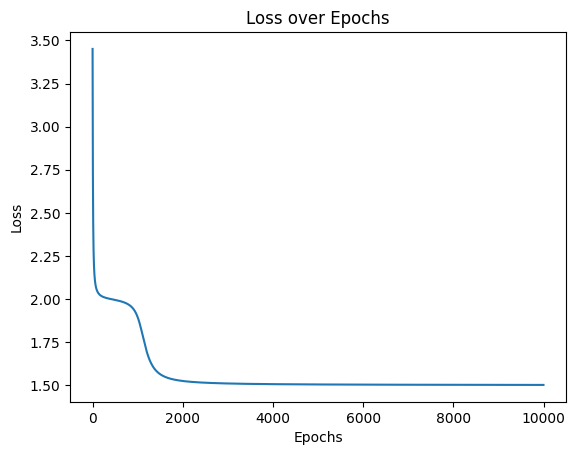

In [326]:

# Training the network
losses = []
for epoch in range(10000):
    total_loss = 0
    for x1, x2, actual in zip(X1, X2, y):
        z1, z2, h1, h2, z3, o = forward_propagation(x1, x2, b1, b2, b3, w1, w2, w3, w4, w5, w6)
        total_loss += 0.5 * (o - actual) ** 2  # Mean Squared Error
        w1, w2, w3, w4, w5, w6, b1, b2, b3 = backpropagation(x1, x2, w1, w2, w3, w4, w5, w6, b1, b2, b3, actual, o, h1, h2, alpha)
    losses.append(total_loss)

# Plotting the loss over iterations
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()
